# BIKE SHARING

## Exploratory Data Analysis (EDA) and Visualization

---
# Introduction

Bike sharing systems are new generation of traditional bike rentals where the process of signing up, renting and returning is automated. Through these systems, users are able to easily rent a bike from one location and return them to another. We will be analyzing bike sharing data from Washington D.C. 

In this project, we will perform tasks to clean, visualize, and explore the bike sharing data. We will also investigate open-ended questions. These open-ended questions allow us to think critically about how the plots we have created, and provide insight into the data.

In [1]:
# Run this cell to set up the notebook. 

import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path

# Default plot configurations

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

---
# Loading Bike Sharing Data

The data we are exploring is collected from a bike sharing system in Washington D.C.

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered  

The following code loads the data into a Pandas DataFrame.

In [2]:
# Run this cell to load the data. 
bike = pd.read_csv('data/bikeshare.txt')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
bike.shape

(17379, 17)

---
# Part I - Data Preparation

A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following project, we will convert these four variables to strings specifying the categories. In particular, we will use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. We will simply use `yes`/`no` for `holiday` and `workingday`. 

In this project, we will *mutate* the data frame, **overwriting the corresponding variables in the data frame.** However, our notebook will effectively document this in-place data transformation for future readers. We make sure to leave the underlying datafile `bikeshare.txt` unmodified.

### I. 1) Decoding `weekday`, `workingday`, and `weathersit`


We manipulate the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: We convert to `yes` and `no`.
1. `weekday`: It turns out that Monday is the day with the most holidays.  We mutate the `weekday` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values. We assume `0` corresponds to `Sun`, `1` to `Mon` and so on.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: We will replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`.

In [4]:
bike['holiday'].value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [5]:
bike['weekday'].value_counts()

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

In [6]:
bike['workingday'].value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

There is more working days than holidays.

In [7]:
bike['weathersit'].value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [8]:
dic = {
    'holiday': {
        0: 'no',
        1: 'yes'
    },
    'weekday': {
        0: 'Sun',
        1: 'Mon',
        2: 'Tue',
        3: 'Wed',
        4: 'Thu',
        5: 'Fri',
        6: 'Sat'
    },
    'workingday': {
        0: 'no',
        1: 'yes'
    },
    'weathersit':{
        1: 'Clear',
        2: 'Mist',
        3: 'Light',
        4: 'Heavy'
    }
}

In [9]:
bike = bike.replace(dic)
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1


### I. 2) Computing Daily Total Counts

The granularity of this data is at the hourly level.  However, for some of the analysis we will also want to compute daily statistics.  In particular, in the next few steps, we will be analyzing the daily number of registered and unregistered users.

We will construct a data frame named `daily_counts` indexed by `dteday` with the following columns:
* `casual`: total number of casual riders for each day
* `registered`: total number of registered riders for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

In [10]:
daily_counts = bike.loc[:, ['dteday', 'casual', 'registered', 'workingday']].groupby('dteday').agg(
    {
    'casual': sum,
    'registered': sum,
    'workingday': 'first'
    })

daily_counts.head()

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes


---
# Part II - Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders.  

### II. 1) Casual vs Registered Users, daily basis

We use the [`sns.distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html) function to create a plot that overlays the distribution of the daily counts of `casual` and `registered` users. The temporal granularity of the records will be daily counts.

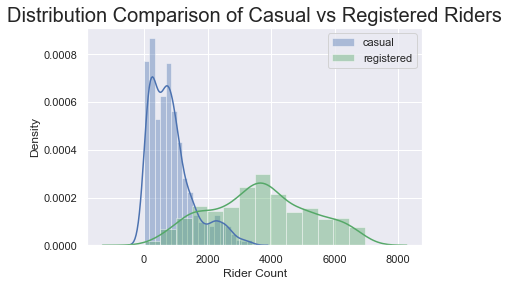

In [11]:
sns.distplot(daily_counts['casual'], label = 'casual')
sns.distplot(daily_counts['registered'],  label = 'registered', color = 'g')
plt.legend()
plt.title("Distribution Comparison of Casual vs Registered Riders", fontsize = 20)
plt.xlabel("Rider Count")
plt.ylabel("Density");

**Conclusion:** The casual riders distribution has a sharp peak at 1000 that may be bimodal. This distribution is skewed right and has a long right tail with a small set of daily counts around 2500. The distribution of registered riders has a more symmetric distribution centered around almost 4000 daily riders. This distribution does not have heavy skew. Its spread is much wider than the casual riders.

### II. 2) Casual vs Registered riders, hourly basis

The density plots do not show us how the counts for registered and casual riders vary together. We use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. This time, let's use the `bike` DataFrame to plot hourly counts instead of daily counts.

The `lmplot` function will also try to draw a linear regression line. We color the points in the scatterplot according to whether or not the day is working day. 

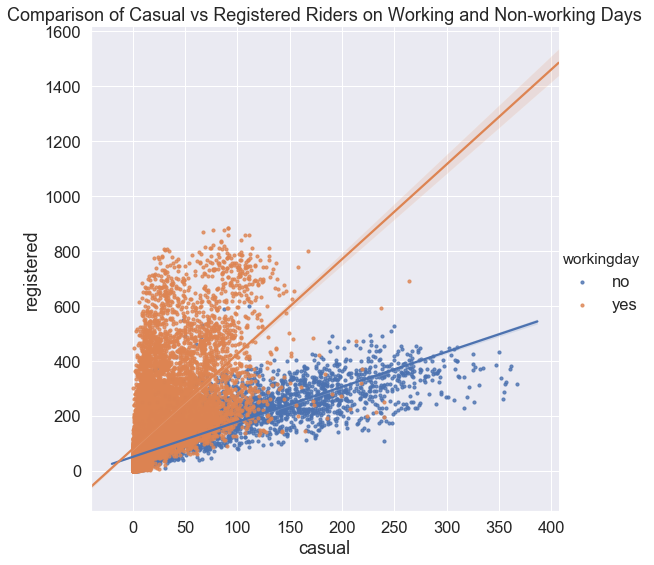

In [12]:
sns.set(font_scale=1.5)
sns.lmplot(x="casual", y="registered", hue="workingday", data=bike, fit_reg=True, height=8, scatter_kws={"s": 10})
plt.title("Comparison of Casual vs Registered Riders on Working and Non-working Days");

**Conclusion:** There appears to be a linear relationship between the counts for registered and casual riders, and this relationship depends on whether the day is a work day or a weekend day. Due to overplotting, it's not possible to see the shape of the blue dataset (workingday = no) because it is occluded, and it is also difficult to determine the degree to which values are concentrated around the regression lines near 0.

---
## Part III - Visualization with Bivariate Kernel Density Plot
 
To address overplotting, let's try visualizing the data with another technique, the bivariate kernel density estimate.

The documentation for `sns.kdeplot` can be found at https://seaborn.pydata.org/generated/seaborn.kdeplot.html

We can think of this plot as an overhead countour or topographical map, where the "high" regions are those with more data points, and "low" regions are those with fewer data points.

A basic kde plot of all the data is quite easy to generate. However, this plot includes both weekend and weekday data, which isn't what we want (see example figure above).

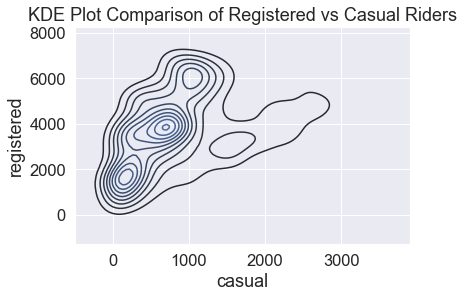

In [13]:
sns.kdeplot(daily_counts['casual'], daily_counts['registered'])
plt.title('KDE Plot Comparison of Registered vs Casual Riders');

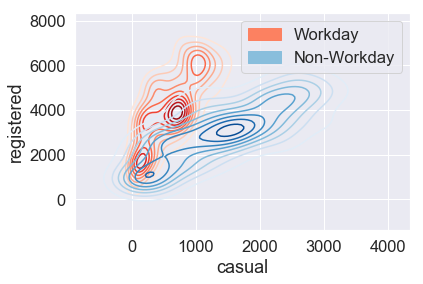

In [14]:
import matplotlib.patches as mpatches  # see the tutorial for how we use mpatches to generate this figure!

# Set 'is_workingday' to a boolean array that is true for all working_days
is_workingday = daily_counts['workingday'] == 'yes'

# Bivariate KDEs require two data inputs. 
# In this case, we will need the daily counts for casual and registered riders on weekdays
casual_weekday = daily_counts.loc[is_workingday, 'casual']
registered_weekday = daily_counts.loc[is_workingday, 'registered']

# Use sns.kdeplot on the two variables above to plot the bivariate KDE for weekday rides
sns.kdeplot(casual_weekday, registered_weekday, cmap="Reds")


# Repeat the same steps above but for rows corresponding to non-workingdays
not_workingday = ~is_workingday

casual_weekend = daily_counts.loc[not_workingday, 'casual']
registered_weekend = daily_counts.loc[not_workingday, 'registered']

# Use sns.kdeplot on the two variables above to plot the bivariate KDE for weekday rides
sns.kdeplot(casual_weekend, registered_weekend, cmap="Blues")

r = sns.color_palette("Reds")[2]
b = sns.color_palette("Blues")[2]

red_patch = mpatches.Patch(color=r, label='Workday')
blue_patch = mpatches.Patch(color=b, label='Non-Workday')

plt.legend(handles=[red_patch,blue_patch]);

**Conclusion:** The association between registered and casual riders appears linear for both categories of days, but with a much higher slope for workdays. We can see from the contour plot that the variability is higher on non-wordays, and the non-workday joint distribution is bimodal. The workday joint distribution appears to be trimodal.

---
# Part IV - Joint Plot

As an alternative approach to visualizing the data, we construct the following set of three plots where the main plot shows the contours of the kernel density estimate of daily counts for registered and casual riders plotted together, and the two "margin" plots (at the top and right of the figure) provide the univariate kernel density estimate of each of these variables. Note that this plot makes it harder see the linear relationships between casual and registered for the two different conditions (weekday vs. weekend).

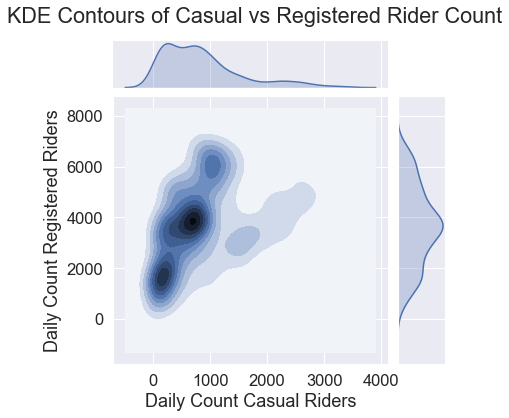

In [15]:
g = sns.jointplot(x="casual", y="registered", data=daily_counts, kind="kde");
g.set_axis_labels("Daily Count Casual Riders", "Daily Count Registered Riders")
plt.suptitle("KDE Contours of Casual vs Registered Rider Count")
plt.subplots_adjust(top=0.9);

---
# Part V - Understanding Daily Patterns

Let's examine the behavior of riders by plotting the average number of riders for each hour of the day over the entire dataset, stratified by rider type.

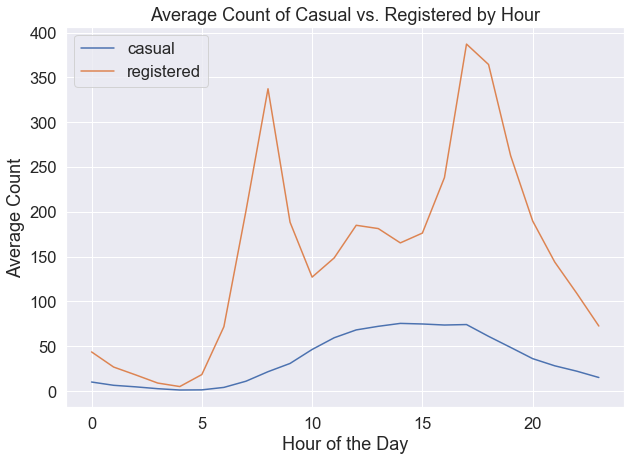

In [16]:
plt.figure(figsize=(10, 7))

hourly_means = bike.groupby('hr').mean()

sns.lineplot(x = hourly_means.index, y = hourly_means['casual'], label = 'casual')
sns.lineplot(x = hourly_means.index, y = hourly_means['registered'], label = 'registered')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.title('Average Count of Casual vs. Registered by Hour');

**Conclusion:** In the above plot, we see strong evidence of daily patterns in both datasets. The casual riders appear to ride throughout the day with peak hours in the mid-afternoon. Alternatively, while the registered riders also ride more during the day than at night there are very strong spikes during the morning and evening commute hours with a small bump during lunch.

---
# Part VI - Exploring Ride Sharing and Weather

Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

### VI. 1) Proportion of casual riders

We create a new column `prop_casual` in the `bike` DataFrame representing the proportion of casual riders out of all riders.

In [17]:
bike['prop_casual'] = bike['casual'] / (bike['casual'] + bike['registered'])
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prop_casual
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1,0.000000


### VI. 2) Visualization with scatterplot

In order to examine the relationship between proportion of casual riders and temperature, we can create a scatterplot using `sns.scatterplot`. We can even use color/hue to encode the information about day of week. Run the cell below, and you'll see we end up with a big mess that is impossible to interpret.

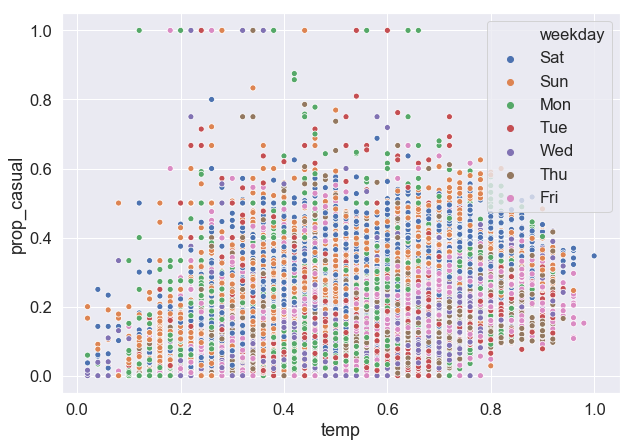

In [18]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=bike, x = "temp", y = "prop_casual", hue = "weekday");

### VI. 3) Visualization with lmplot

We could attempt linear regression using `sns.lmplot` as shown below, which hint at some relationships between temperature and proportional casual, but the plot is still fairly unconvincing. 

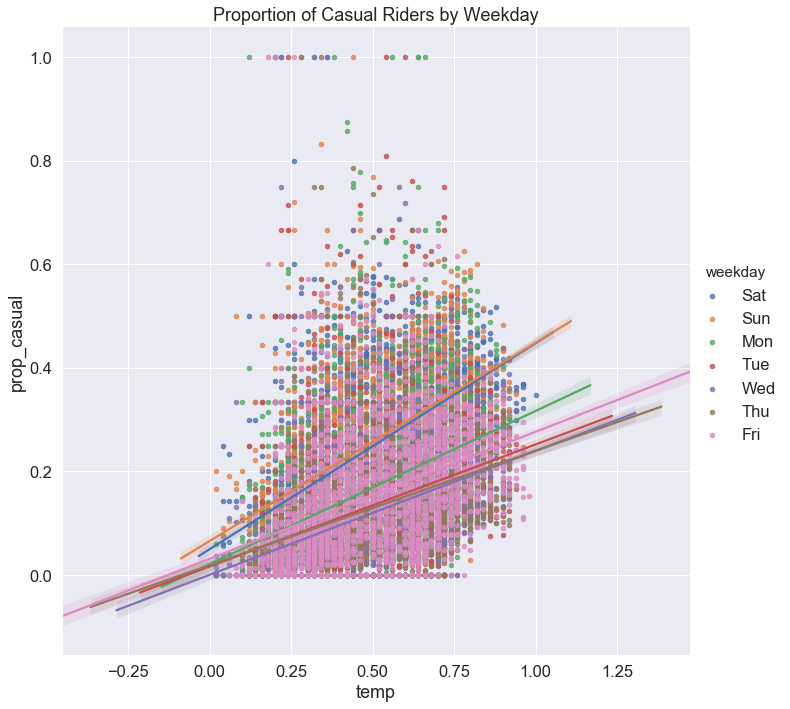

In [19]:
sns.lmplot(data=bike, x="temp", y="prop_casual", hue="weekday", scatter_kws={"s": 20}, height=10)
plt.title("Proportion of Casual Riders by Weekday");

### VI. 4) Local Smoothing

A better approach is to use local smoothing. The basic idea is that for each x value, we compute some sort of representative y value that captures the data close to that x value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. An example is below. The red curve shown is a smoothed version of the scatterplot.

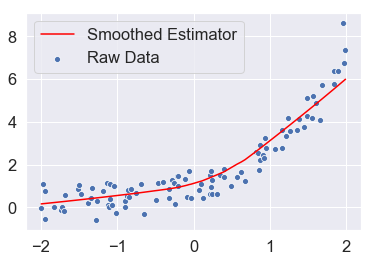

In [20]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2)
yobs = np.exp(xobs) + np.random.randn(100) / 2.0
sns.scatterplot(xobs, yobs, label="Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(xobs, ysmooth, label="Smoothed Estimator", color='red')
plt.legend();

### VI. 5) Day curves

In our case with the bike ridership data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual riders.

We will use [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) just like the example above. Unlike the example above, we only plot the lowess curve. We do not plot the actual data, which would result in overplotting. For this problem, the simplest way is to use a loop.

**Note:** 
Look at the top of this project notebook for a description of the temperature field to know how to convert to Fahrenheit. By default, the temperature field ranges from 0.0 to 1.0. 

$\text{Fahrenheit} = \text{Celsius} * \frac{9}{5} + 32$.

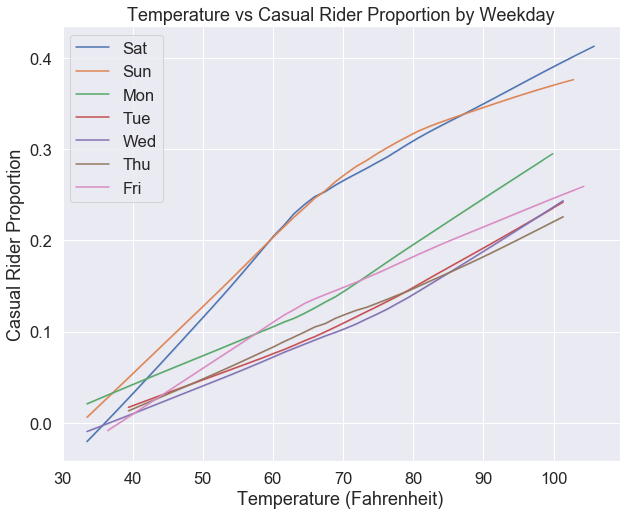

In [21]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(10,8))

for day in bike['weekday'].unique():
    this_day = bike[bike['weekday'] == day].copy()
    this_day['temp'] = this_day['temp'] * 41 * 9 / 5 + 32 
    ysmooth = lowess(this_day['prop_casual'], this_day['temp'], return_sorted=False)
    sns.lineplot(this_day['temp'], ysmooth, label=day)

plt.title("Temperature vs Casual Rider Proportion by Weekday")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Casual Rider Proportion")
plt.legend();

**Conclusion:** As temperature increases, the proportion of casual riders increases as well, and this trend appears to continue even into very hot weather. Weekends (Saturday, Sunday) have higher proportion of casual riders (which we saw before). There are four distinct typees of days: weekends, Mondays, Fridays, and mid-week days. 